# 分類 Classification  
1次元入力2クラス分類の場合  
入力変数 $x_n$、目標変数 $t_n$ 0か1をとる変数  
　　昆虫$N$匹、重量$x_n$、性別$t_n$


In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
# データ生成
np.random.seed(seed=0)
X_min = 0
X_max = 2.5
X_n = 30
X_col = ['cornflowerblue', 'gray']
X = np.zeros(X_n)
T = np.zeros(X_n, dtype=np.uint8)
Dist_s = [0.4, 0.8]    # 分布開始地点
Dist_w = [0.8, 1.6]    # 分布の幅
Pi = 0.5  # クラス0の比率
for n in range(X_n):
    wk = np.random.rand()
    # wk < Pi の場合は 0、 wk >= Pi ならば 1
    T[n] = 0 * (wk < Pi) + 1 * (wk >= Pi) 
    X[n] = np.random.rand() * Dist_w[T[n]] + Dist_s[T[n]]

print("X=", np.round(X,2))
print("T=", T)

X= [1.94 1.67 0.92 1.11 1.41 1.65 2.28 0.47 1.07 2.19 2.08 1.02 0.91 1.16
 1.46 1.02 0.85 0.89 1.79 1.89 0.75 0.9  1.87 0.5  0.69 1.5  0.96 0.53
 1.21 0.6 ]
T= [1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0]


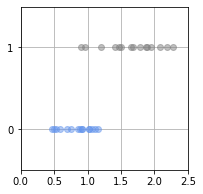

In [35]:
# データ分布表示

def show_data1(x, t):
    K = np.max(t) + 1
    for k in range(K):
        plt.plot(x[t == k], t[t == k], X_col[k], alpha=0.5, ls='None', marker='o')
    plt.grid(True)
    plt.ylim(-.5, 1.5)
    plt.xlim(X_min, X_max)
    plt.yticks([0, 1])

fig = plt.figure(figsize=(3,3))
show_data1(X, T)
plt.show()

W2= [ 0.74754679 -0.42953018]
W= [ 0.74754679 -0.42953018]


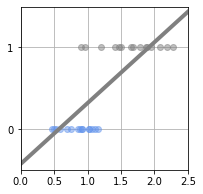

In [36]:
# 直線モデルでfitすると不都合がおきる
def fit_line(x, t):
    mx = np.mean(x)
    mt = np.mean(t)
    mtx = np.mean(t * x)
    mxx = np.mean(x * x)
    w0 = (mtx - mt * mx ) / (mxx - mx**2)
    w1 = mt - w0 * mx
    return np.array([w0, w1])

def fit_line_D(x, t):
    x_T = x.T
    a = x_T.dot(x)
    b = np.linalg.inv(a)
    c = b.dot(x_T)
    w = c.dot(t)
    return w

def show_line(w):
    xb = np.linspace(X_min, X_max, 100)
    y = w[0] * xb + w[1]
    plt.plot(xb, y, c=(.5, .5, .5), lw=4)

fig = plt.figure(figsize=(3,3))
show_data1(X, T)

# ※切片も追加の一次元として考える、追加次元は常に１を取る
Xn = np.array([X, np.ones_like(X)])
Xn = np.transpose(Xn)
W2 = fit_line_D(Xn, T)
print("W2=",W2)

W = fit_line(X, T)
print("W=",W)
show_line(W)
plt.show()

## こういう場合は決定境界を引いて解決する  
decision boundary  
質量データが決定境界より小さい場合 ⇒ メス  
質量データが決定境界より大きい場合 ⇒ オス  
どうやって決定境界を決めるか？  

## 直線モデルだと明らかにおかしい  
線形回帰で直線引いて 0.5 を決定境界としても誤差が大きい  
0.8g ～ 1.2g 間でオスとメス両方が存在するので、確率論になってくる。  
　
## 確率で表すクラス分類  
・オスである確率  $ P(t = 1|x) $   
　$x ≦ 0.8g$のとき確率0  
　$0.8g ＜ x ≦ 1.2g$のとき確率$1/3$  
　$1.2g ＜ x$のとき確率100  
　  
・メスである確率  $ 1 - P(t = 1|x) $   


## 最尤推定  
$0.8g ＜ x ≦ 1.2g$のとき、$ P(t = 1|x) = 1/3$であることをデータから推定すべき、  
例）4回試行して、はじめの3回はt=0, 4回目はt=1だった場合、    
t = 1 を確率 w で生成するモデル  
$$
P(t=1|x) = w
$$
  
### 尤度  
Tが[0, 0, 0, 1] モデルから生成された確率  

例えば w が0.1のときの尤度  
$w = P(t=1|x) = 0.1$ なので、t = 1となる確率は0.1、t = 0となる確率は0.9  
Tが[0, 0, 0, 1]になる確率（尤度）は、$0.9×0.9×0.9×0.1 = 0.0729$  
  
同様に w が0.2のときの尤度は、$0.8×0.8×0.8×0.2 = 0.1024$  
  
T=[0, 0, 0, 1]を生成したモデルのパラメータwは尤度の高いw=2の方がもっともらしい  
尤度の最大値を求めれば、一番もっともらしいwが求まるはず  
  
### 最尤推定　wの最大値が推定値として扱われる   
$$
P(T=0,0,0,1|x) = (1-w)^3w
$$
  
### 最大値の求め方　対数尤度（確率世界での目的関数　平均二乗誤差関数の代わり）  
両辺の対数を取ると計算しやすくなる。（関係式 $\log_aM^r = r\log_aM　,\log_aMN = \log_aM + \log_aN$）   
対数は単調増加の関数なので、Pを最大にするwとlogPを最大にするwは変わらない  
$$
logP = log\{(1-w)^3w\} = 3log(1-w) + logw
$$  

平均二乗誤差関数では最小化するパラメータを探してたが、対数尤度では最大化するパラメータを探す。  
求め方はどっちも同じく微分して傾きが0のポイントを探せばよい。

$$
\frac{d}{dw}logP = \frac{d}{dw}[3log(1-w)+logw]=0
$$  
$log(x)' = \frac{1}{x}$を適用すると
$$
3 \frac{-1}{1-w} + \frac{1}{w} = 0
$$

$$
\frac{-3w+1-w}{(1-w)w} = 0
$$  

分母は0にならないので両辺に (1-w)w をかける
$$
-3w + 1 - w = 0
$$
$$
w = \frac{1}{4}
$$
T = 0,0,0,1 の場合、wは1/4になる

## ロジスティック回帰  
データがガウス分布に従っていると仮定した場合、$P(t=1|x)$ はロジスティック回帰モデルで表せる  
  
### シグモイド関数  
$$
σ(x) = \frac{1}{1 + exp(-x)}
$$  
$exp(-x)$ のグラフ  
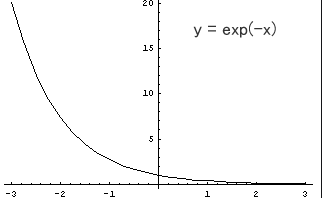  

### 直線モデルにシグモイド関数を通す
直線式 $y=w_0x + w_1$ をシグモイド関数に当てはめると  
$$
y=σ(w_0x + w_1) = \frac{1}{1+exp\{-(w_ox+w_1)\}}
$$


1.25

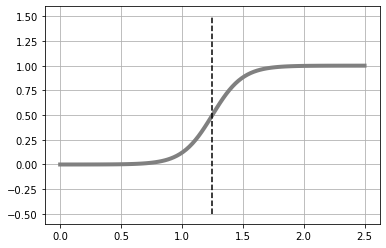

In [68]:
# シグモイド関数
def sigmoid(x):
    y = 1 / ( 1 + np.exp(-x) )
    return y

# シグモイド関数に直線式を当てはめる ロジスティック回帰
def logistic(x, w):
    y = sigmoid(w[0] * x + w[1])
    return y

# ロジスティックモデルをグラフ表示 
def show_logistic(w):
    xb = np.linspace(X_min, X_max, 100)
    y = logistic(xb, w)
    plt.plot(xb, y, c ='gray', lw=4)
    
    # 決定境界
    i = np.min(np.where(y > 0.5)) 
    B = (xb[i - 1] + xb[i]) / 2
    plt.plot([B,B], [-.5, 1.5], c='k', ls='--')
    plt.grid(True)
    return B

W = [8, -10]
show_logistic(W)

# 交差エントロピー誤差  
$$
q:訓練データの確率、p:学習した確率
$$
$$
pとqが近似すると数値が小さくなり、pとqが近似しなくなると数値が大きくなる。
$$
$$
E=-\sum_{k}{{q(k)}log(p(k))}
$$
ロジスティック回帰モデルを使ってxがt=1となる確率の式
$$
y=σ(w_0x + w_1) = P(t=1|x)
$$
$t=1$がモデルから生成される確率は$y$。$t=0$だったら$1-y$。  
$t$の値によって$y$や$1-y$に変わらないように式を変化させると、  

$$
P(t|x) = y^t(1-y)^{1-t}
$$  

データがN個の場合、与えられた$\boldsymbol{X} = x_0, …, x_{N-1}$クラス$\boldsymbol{T}=t_0, …, t_{N-1}$の生成確率、  
各データの総乗になる。  
$$
P(\boldsymbol{T}|\boldsymbol{X}) = \prod_{n=0}^{N-1}P(t_n|x_n)=\prod_{n=0}^{N-1}y_n^{t_n}(1-y_n)^{1-t_n}
$$  

対数尤度が最大となるように$w_0、w_1$を求める  
$$
logP(\boldsymbol{T}|\boldsymbol{X})=\sum_{n-0}^{N-1}\{t_n log y_n +(1 - t_n) log (1 - y_n)\}
$$  

-1をかけて、平均二乗誤差と同じように誤差が最小となるようにパラメータを求める  
### 平均交差エントロピー誤差 E(w)  
$$
E(w) = - \frac{1}{N} logP(\boldsymbol{T}|\boldsymbol{X}) = - \frac{1}{N} \sum_{n-0}^{N-1}\{t_n log y_n +(1 - t_n) log (1 - y_n)\}
$$



In [38]:
# 交差エントロピー誤差
def cee_logistic(w, x, t):
    y = logistic(x, w)
    cee = 0
    for n in range(len(y)):
        cee = cee - ( t[n] * np.log(y[n]) + (1 - t[n]) * np.log(1 - y[n]) )
    #cee = cee / X_n
    cee = cee / len(x)
    return cee

W=[1,1]
W=[9,-9]
cee_logistic(W,X,T)


0.3154634194296548

In [39]:
W,X,T

([9, -9],
 array([1.94430299, 1.67181309, 0.91671529, 1.1134184 , 1.41350643,
        1.64623187, 2.28095462, 0.46970344, 1.06609588, 2.19201944,
        2.0786537 , 1.02442334, 0.91193682, 1.15573513, 1.4634591 ,
        1.01938695, 0.85474716, 0.8941084 , 1.78709439, 1.89091248,
        0.74962556, 0.89636075, 1.87302059, 0.50314104, 0.69096862,
        1.50176242, 0.9632717 , 0.52904761, 1.20526656, 0.59554047]),
 array([1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
        1, 0, 0, 1, 1, 0, 1, 0], dtype=uint8))

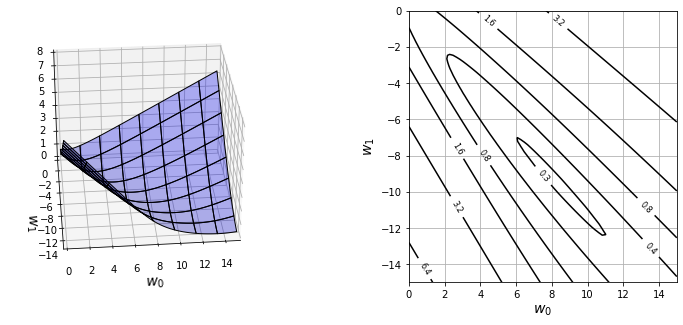

In [40]:
from mpl_toolkits.mplot3d import Axes3D


wn = 80  # 等高線表示解像度
w_range = np.array([[0, 15], [-15, 0]])
w0 = np.linspace(w_range[0,0], w_range[0, 1], wn)
w1 = np.linspace(w_range[1,0], w_range[1, 1], wn)
ww0, ww1 = np.meshgrid(w0, w1)
C = np.zeros((len(w1), len(w0)))
w = np.zeros(2)
for i0 in range(wn):
    for i1 in range(wn):
        w[0] = w0[i0]
        w[1] = w1[i1]
        C[i1, i0] = cee_logistic(w, X, T)

plt.figure(figsize=(12,5))
plt.subplots_adjust(wspace=0.5)
ax = plt.subplot(1,2,1,projection='3d')
ax.plot_surface(ww0, ww1, C, color='blue', ec='black', rstride=10, cstride=10, alpha=0.3)
ax.set_xlabel('$w_0$', fontsize=14)
ax.set_ylabel('$w_1$', fontsize=14)
ax.set_xlim(0, 15)
ax.set_ylim(-15,0)
ax.set_zlim(0, 8)
ax.view_init(30, -95)

plt.subplot(1, 2, 2)
cont = plt.contour(ww0, ww1, C, 20, colors='black', levels=[0.26, 0.4, 0.8, 1.6, 3.2, 6.4])
cont.clabel(fmt='%.1f', fontsize=8)
plt.xlabel('$w_0$', fontsize=14)
plt.ylabel('$w_1$', fontsize=14)
plt.grid(True)
plt.show()


$y_n$がシグモイド関数を含んでいるため、交差エントロピー誤差が最小になるパラメータの解析解は求めることができない。  
勾配法を使う。  
平均交差エントロピー誤差$E(\boldsymbol{w})$を$w_0$で偏微分したものを求めていく  
$$
E(\boldsymbol{w}) = \frac{1}{N} \sum_{n=0}^{N-1} E_n(\boldsymbol{w})
$$
$$
E_n(\boldsymbol{w}) = -t_n \log y_n - (1-t_n) \log(1-y_n)
$$  

偏微分
$$
\frac{∂}{∂w_0} E(\boldsymbol{w} = \frac{1}{N} \sum_{n=0}^{N-1} \frac{∂}{∂w_0} E_n(\boldsymbol{w})
$$  

$ E_n(\boldsymbol{w})$ の中身の $y_n$ ロジスティックモデルの出力
$$
yn = σ(a_n) = \frac{1}{1+\exp(-a_n)}
$$

$a_n$ 入力総和
$$
a_n = w_0 x_n + w_1
$$  

$ E_n(\boldsymbol{w})$ は入れ子の関数と解釈できる
$$
E_n( y_n (a_n (\boldsymbol{w}) ) )
$$  

入れ子関数の微分
$$
\frac{∂E_n}{∂w_0} = \frac{∂E_n}{∂y_n}・\frac{∂y_n}{∂a_n}・\frac{∂a_n}{∂w_0}
$$

一つずつ偏微分していく、$\frac{∂E_n}{∂y_n}$から
$$
\frac{∂E_n}{∂y_n} = \frac{∂}{∂y_n}\{-t_n \log y_n-(1-t_n) \log(1- y_n)\}
$$
$$
=-t_n \frac{∂}{∂y_n} \log y_n -(1-t_n) \frac{∂}{∂y_n}\log(1-y_n)
$$
公式適用 $\{\log(x)\}'=1/x$、$\{\log(1-x)\}' = -1/(1-x)$
$$
\frac{∂E_n}{∂y_n} = -\frac{t_n}{y_n} + \frac{1-t_n}{1-y_n}
$$  

$\frac{∂y_n}{∂a_n}$を求める、シグモイド関数の微分公式 $\{σ(x)\}' = σ(x)\{1-σ(x)\}$
$$
\frac{∂y_n}{∂a_n} = \frac{∂}{∂a_n}σ(a_n) = σ(a_n)\{1-σ(a_n)\} = y_n(1-y_n)
$$  

$\frac{∂a_n}{∂w_0}$を求める
$$
\frac{∂a_n}{∂w_0} = \frac{∂}{∂w_0}(w_0x_n + w_1) = x_n
$$  

求めた式を代入すると
$$
\frac{∂E_n}{∂w_0} = \Bigl( -\frac{t_n}{y_n} + \frac{1-t_n}{1-y_n}\Bigl)y_n(1-y_n)x_n = (y_n - t_n) x_n
$$  
$$
\frac{∂E}{∂w_0} = \frac{1}{N} \sum_{n=0}^{N-1}(y_n - t_n)x_n
$$  

同様に$w_1$での偏微分を求めると
$$
\frac{∂E}{∂w_1} = \frac{1}{N} \sum_{n=0}^{N-1}(y_n - t_n)
$$

In [44]:
# 平均交差エントロピー誤差の微分
def dcee_logistic(w, x, t):
    y = logistic(x, w)
    dcee = np.zeros(2)
    for n in range(len(y)):
        dcee[0] = dcee[0] + (y[n] - t[n]) * x[n]
        dcee[1] = dcee[1] + (y[n] - t[n]) 
    dcee = dcee / X_n
    return dcee

W=[2, 2]
dcee_logistic(W, X, T)

    

array([0.40189315, 0.4828874 ])

w0 = 8.17, w1 = -9.38
CEE = 0.25
Boundary = 1.15 g


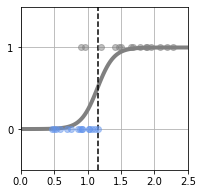

In [42]:
# 勾配法による解
from scipy.optimize import minimize

def fit_logistic(w_init, x, t):
    # 勾配法で最小の平均交差エントロピー誤差を求める
    # 交差エントロピー関数：cee_logistic
    # 微分関数：dcee_logistic
    # method="CG"：共役勾配法を指定（共役勾配法は学習率不要）
    res1 = minimize(cee_logistic, w_init, args=(x, t), jac=dcee_logistic, method="CG")
    return res1.x

plt.figure(figsize=(3,3))
W_init=[1,1]
# 最小誤差時のW
W = fit_logistic(W_init, X, T)
print("w0 = {0:.2f}, w1 = {1:.2f}".format(W[0], W[1]))

# ロジスティック回帰を表示
B = show_logistic(W)

# 訓練データ表示
show_data1(X, T)

plt.ylim(-.5, 1.5)
plt.xlim(X_min, X_max)

# 平均交差エントロピー誤差表示
cee = cee_logistic(W, X, T)
print("CEE = {0:.2f}". format(cee))

# 決定境界表示
print("Boundary = {0:.2f} g".format(B))

plt.show()

In [45]:
W_init=[1,1]
# 最小誤差時のW
W = fit_logistic(W_init, X, T)
print("w0 = {0:.2f}, w1 = {1:.2f}".format(W[0], W[1]))

w0 = 8.17, w1 = -9.38


In [66]:
w = W
xb = np.linspace(X_min, X_max, 100)
y = logistic(xb, w)
# 決定境界
i = np.min(np.where(y > 0.5)) 
# y < 5 と y > 5 の間
B = (xb[i - 1] + xb[i]) / 2




array([0.        , 0.02525253, 0.05050505, 0.07575758, 0.1010101 ,
       0.12626263, 0.15151515, 0.17676768, 0.2020202 , 0.22727273,
       0.25252525, 0.27777778, 0.3030303 , 0.32828283, 0.35353535,
       0.37878788, 0.4040404 , 0.42929293, 0.45454545, 0.47979798,
       0.50505051, 0.53030303, 0.55555556, 0.58080808, 0.60606061,
       0.63131313, 0.65656566, 0.68181818, 0.70707071, 0.73232323,
       0.75757576, 0.78282828, 0.80808081, 0.83333333, 0.85858586,
       0.88383838, 0.90909091, 0.93434343, 0.95959596, 0.98484848,
       1.01010101, 1.03535354, 1.06060606, 1.08585859, 1.11111111,
       1.13636364, 1.16161616, 1.18686869, 1.21212121, 1.23737374,
       1.26262626, 1.28787879, 1.31313131, 1.33838384, 1.36363636,
       1.38888889, 1.41414141, 1.43939394, 1.46464646, 1.48989899,
       1.51515152, 1.54040404, 1.56565657, 1.59090909, 1.61616162,
       1.64141414, 1.66666667, 1.69191919, 1.71717172, 1.74242424,
       1.76767677, 1.79292929, 1.81818182, 1.84343434, 1.86868

# おさらい
①体重から性別を判断、オス:1、メス:0   
②決定境界を引いて、小さい側がメス、大きい側がオスというようにすればよい  
③直線の回帰モデルでy=0.5を決定境界にすると、不都合が起きる  
　　オスもメスも存在する重量帯がある、確率的な問題になる。  
④↑の重量帯でオスとなる確率（尤度）が最大となる場合を求める、最尤推定  
⑤重量データがガウス分布に従っている仮定するなら、オスである確率はロジスティック回帰モデルで表せる  
　　直線式$y = w_0x + w_1$をシグモイド関数の中に入れた形  
⑥N個のデータで与えられた $X = x0,x1,x2,...,x_{N-1}$ に対して$T = t0,t1,t2,...,t_{N-1}$ の生成確率は、  
　　⑤の式１つ１つを全て掛け算する  
⑦ ⑥の対数尤度が最大になるように求めればよいが、今までと同じく最小となるように求めるために-1を掛ける  
　　交差エントロピー誤差  
⑧ ⑦をNで割って平均を取ったものを平均交差エントロピー誤差  
⑨ ⑧を勾配法で最小となる$w_0, w_1$を求める  
⑩ $P(t=1|x) = 0.5$ となるxを決定境界とする  
  　